# Project Inght into House Prices

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import statsmodels.api as sm

In [2]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

In [3]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


<h1>Task 4</h1>

<h3>1. For the "Median value of owner-occupied homes" provide a boxplot</h3>

Text(0.5, 1.0, 'Box plot for Value of Owner-occupied homes')

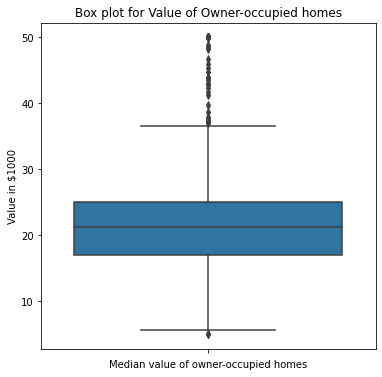

In [4]:
plt.figure(figsize=(6, 6))
sns.boxplot(y='MEDV', data=boston_df)
plt.xlabel('Median value of owner-occupied homes')
plt.ylabel('Value in $1000')
plt.title("Box plot for Value of Owner-occupied homes")

It can be seen that most values are around \\$ 20 000 and the mean is about \\$21 000. We also see that all values above \\$38 000 are outliers, so the maximum is about \\$25 000

<h3>2. Provide a  bar plot for the Charles river variable.</h3>

Text(0.5, 1.0, 'Bar plot for Proportion of houses near the Charles river')

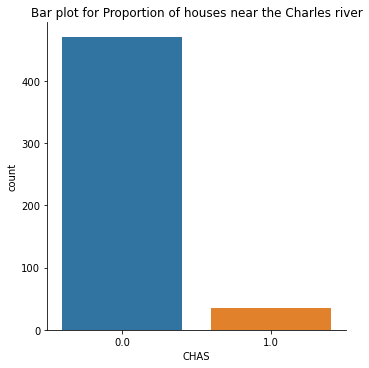

In [5]:
sns.catplot(x='CHAS', kind='count', data=boston_df)
plt.title("Bar plot for Proportion of houses near the Charles river")

Where 0 means no and 1 means yes. It can be seen that the vast majority of houses are not near the Charles River

<h3>3. Provide a boxplot for the MEDV variable vs the AGE variable.</h3>

In [6]:
#Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older
boston_df.loc[boston_df['AGE']<=35, 'AgeGroup'] = '35 and Lower'
boston_df.loc[(boston_df['AGE']>35)&(boston_df['AGE']<70), 'AgeGroup'] = '35 to 70'
boston_df.loc[boston_df['AGE']>=70, 'AgeGroup'] = '70 and Higher'

Text(0.5, 1.0, 'Box Plot for Median value of owner-occupied homes(MEDV) and Age Groups')

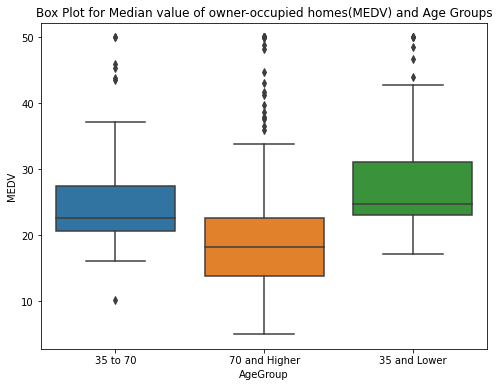

In [7]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='AgeGroup', y='MEDV', data=boston_df)
plt.title("Box Plot for Median value of owner-occupied homes(MEDV) and Age Groups")

It can be observed that older people tend to own lower value houses. The younger the owner the higher the house value

<h3>4. Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion 
#of non-retail business acres per town. What can you say about the relationship?<h3/>

Text(0.5, 1.0, 'Scatter Plot of Nitric Oxide Concentration vs Proportion of non-retail business acres per town')

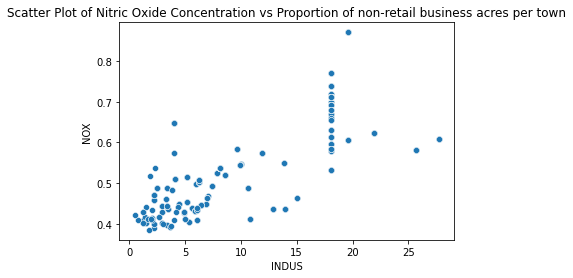

In [8]:
sns.scatterplot(y='NOX', x='INDUS', data=boston_df)
plt.title('Scatter Plot of Nitric Oxide Concentration vs Proportion of non-retail business acres per town')

There seem to be a positive correlation between the two variable. As the proportion of non-retail business area increases, the concentration of NOX also increases

<h3>5. Create a histogram for the pupil to teacher ratio variable</h3>

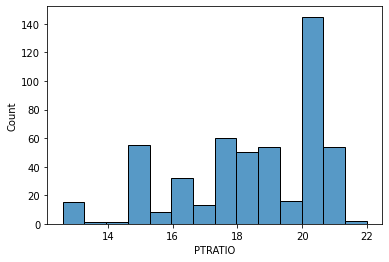

In [9]:
ax = sns.histplot(boston_df['PTRATIO'])

The distribution Seems skewed to the right, meaning higher ratio are more frequent than lower ones

<h1>Task 5 </h1>

<h3>1. Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

</h3>

### State the Hypothesis
* Null Hypothesis : x1 = x2 (There is no difference in median value of houses bounded by Charles River)
* Alternative Hypothesis : x1 != x2 (There is a significant difference in median value of houses bounded by Charles River)

Alpha = 0.05

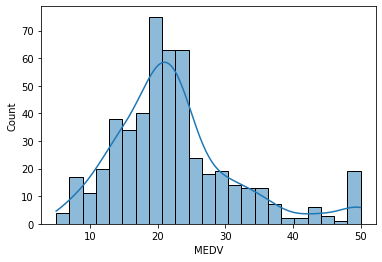

In [10]:
#CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
#Let's check that the dependent variable follows a normal distribution
ax = sns.histplot(boston_df['MEDV'], kde=True)

In [11]:
#Let's test for significance using Levene.
#For this test, the Null is :Variances are equal
scipy.stats.levene(boston_df[boston_df['CHAS']==0]['MEDV'],
                  boston_df[boston_df['CHAS']==1]['MEDV'], center = 'mean')

LeveneResult(statistic=8.751904896045998, pvalue=0.003238119367639829)

In [12]:
#As the P-value is less than 0.05 then we reject the null of equal variances
#Now we perform the T-test
scipy.stats.ttest_ind(boston_df[boston_df['CHAS']==0]['MEDV'],
                  boston_df[boston_df['CHAS']==1]['MEDV'], equal_var=False)

Ttest_indResult(statistic=-3.113291312794837, pvalue=0.003567170098137517)

<b>As the P-Value for the T-test is less than 0.05 then we reject the Null Hypothesis and conclude that there is not enough evidence to support equal median values of houses bounded by Charles River and those not bounded by Charles River. Thus the Medians are significantly different.</b>

<h3>2. Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)</h3>

In [13]:
#We will use the three groups of Age we created earlier
ThirtyFiveLess = boston_df[boston_df['AgeGroup']=='35 and Lower']['MEDV']
ThirtyFiveSeventy = boston_df[boston_df['AgeGroup']=='35 to 70']['MEDV']
SeventyPlus = boston_df[boston_df['AgeGroup']=='70 and Higher']['MEDV']

Stating our Hypotheses:
* H_0 : There is no difference between the three Median Values
* H_a : At least one median value differs

Alpha = 0.05

In [14]:
#Now let's test for equality of variances
scipy.stats.levene(ThirtyFiveLess, ThirtyFiveSeventy, SeventyPlus, center='mean')

LeveneResult(statistic=2.780620029374844, pvalue=0.06295337343259205)

Since the P-Value of the Levene Test is greater than 0.05 then we fail to reject the null of this test that there is equal variance.

In [15]:
#Now we run the One-Way ANOVA
scipy.stats.f_oneway(ThirtyFiveLess, ThirtyFiveSeventy, SeventyPlus)

F_onewayResult(statistic=36.40764999196599, pvalue=1.7105011022702984e-15)

<b>The P-Value is way less than 0.05, we reject the Null hypothesis as there is enough evidence that at least one Median Value Differs.</b>

<h3>3. Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)</h3>
Alpha = 0.05
<br>Null is H_0 : There is no Relationship between the NO concentrations and the proportions

In [16]:
#We plotted the scatter plot above and there seemed to be a relationship between Nitric Oxide Concentrations and Proportion of Non-Retail business Area
#But we will run the Pearson Correlation test to verify
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

(0.7636514469209151, 7.913361061238693e-98)

<b>The P-Value Is way Lower than 0.05, We reject the Null and Conclude that there is indeed a relationship between NO concentration and the Business Area, and looking at the Correlation Coefficient of 0.76 we observe that this is a strong positive relationship.</b>

<h3>4. What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)</h3>
Again, Our Alpha will be = 0.05; and the Null will be that there is not impact.

In [17]:
#We have one independent variable : "DIS" - The Weighted Distances to Five Boston Employment Centres
#And one Dependent variable : "MEDV" - The Median Value of Owner Occupied Homes
X = boston_df['DIS']
y = boston_df['MEDV']

#Add an intercept to our model as Y = aX +b
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

#Print out the statistics
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Fri, 13 May 2022   Prob (F-statistic):           1.21e-08
Time:                        01:48:14   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0

/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<b>Asthe P-Value = 1.21e-08 is lower than 0.05 then we reject the Null and conclude that there is an impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes.</b>